In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"glenn17","key":"f1764de0b3fbf1990472324a34d2c54a"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 673M/675M [00:23<00:00, 31.5MB/s]
100% 675M/675M [00:23<00:00, 30.4MB/s]


In [ ]:
!mkdir data
!unzip cell-images-for-detecting-malaria.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_

In [ ]:
# Parasitized cell images
!ls /content/data/cell_images/Parasitized | wc -l

13780


In [ ]:
# Uninfected cell images
!ls /content/data/cell_images/Uninfected | wc -l

13780


         Class  Num_Images  Mean_Height  Mean_Width  Min_Height  Min_Width  \
0  Parasitized       13780   134.386893  133.631831          40         46   
1   Uninfected       13780   131.580013  131.342478          49         49   

   Max_Height  Max_Width  
0         385        394  
1         235        247  


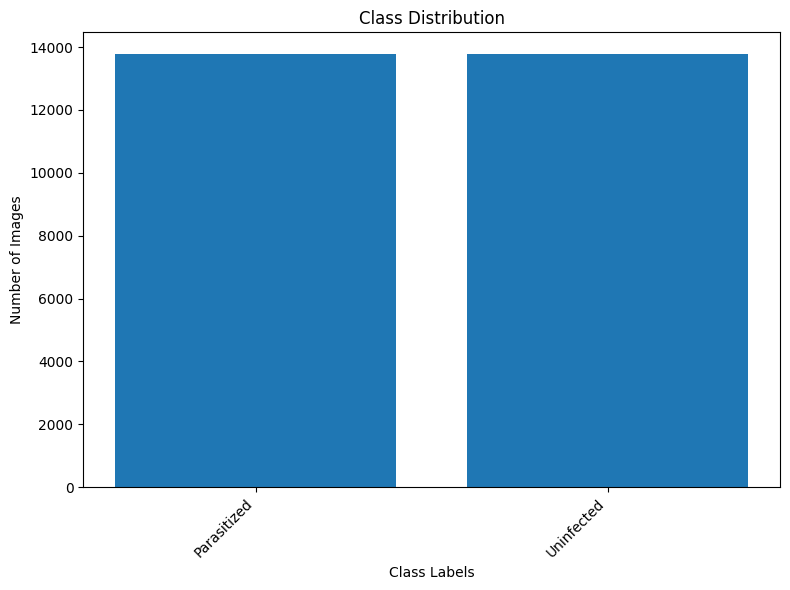

In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the dataset directory
data_directory = '/content/data/cell_images'  # Update with the actual path to your dataset

# Function to load the dataset and extract image statistics
def get_image_stats(data_dir):
    class_labels = ['Parasitized', 'Uninfected']
    image_stats = []

    for label in class_labels:
        class_dir = os.path.join(data_dir, label)
        num_images = len(os.listdir(class_dir))
        image_sizes = []

        for image_file in os.listdir(class_dir):
            if image_file.endswith(".png"):
                image_path = os.path.join(class_dir, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                height, width = image.shape
                image_sizes.append((height, width))

        image_sizes = np.array(image_sizes)
        mean_height, mean_width = np.mean(image_sizes, axis=0)
        min_height, min_width = np.min(image_sizes, axis=0)
        max_height, max_width = np.max(image_sizes, axis=0)

        image_stats.append({
            'Class': label,
            'Num_Images': num_images,
            'Mean_Height': mean_height,
            'Mean_Width': mean_width,
            'Min_Height': min_height,
            'Min_Width': min_width,
            'Max_Height': max_height,
            'Max_Width': max_width
        })

    return image_stats

# Get data summary
data_summary = get_image_stats(data_directory)

# Convert data summary to a pandas DataFrame for easier visualization
data_summary_df = pd.DataFrame(data_summary)

# Display the data summary
print(data_summary_df)

# Plot bar chart for class distribution
plt.figure(figsize=(8, 6))
plt.bar(data_summary_df['Class'], data_summary_df['Num_Images'])
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

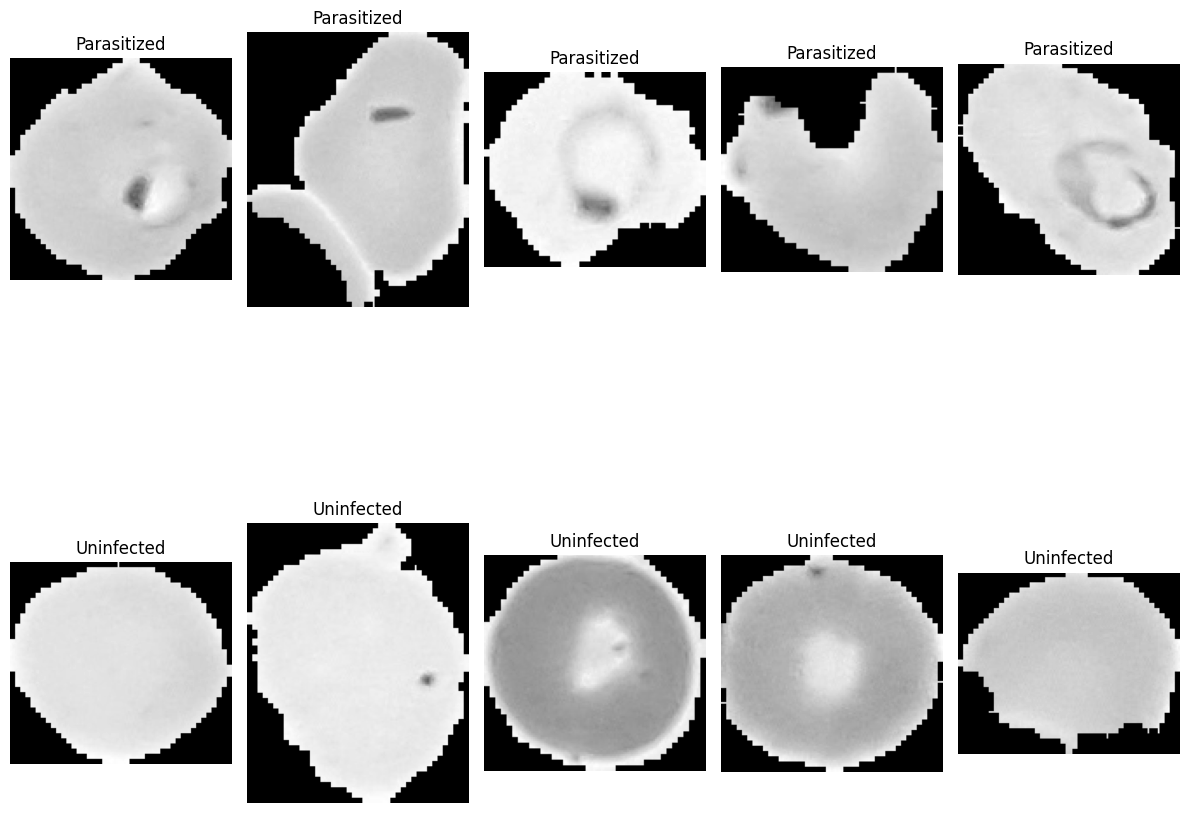

In [ ]:
data_directory = '/content/data/cell_images'
def load_sample_images(data_dir, num_samples=5):
    class_labels = ['Parasitized', 'Uninfected']
    sample_images = []

    for label in class_labels:
        class_dir = os.path.join(data_dir, label)
        image_files = os.listdir(class_dir)
        sample_files = np.random.choice(image_files, num_samples, replace=False)

        for image_file in sample_files:
            if image_file.endswith(".png"):
                image_path = os.path.join(class_dir, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                sample_images.append((label, image))

    return sample_images

# Load sample cell images
num_samples_per_class = 5
sample_images = load_sample_images(data_directory, num_samples=num_samples_per_class)

fig, axes = plt.subplots(len(sample_images) // num_samples_per_class, num_samples_per_class, figsize=(12, 12))
for i, (label, image) in enumerate(sample_images):
    row = i // num_samples_per_class
    col = i % num_samples_per_class
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(label)

# Display the plot
plt.tight_layout()
plt.show()

Resizing and Splitting Data



In [ ]:
# resizing and splitting into test and train

import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Data Preprocessing: Resizing
image_size = (128, 128)  # Choose the desired image size for resizing

def resize_images(data_dir, image_size):
    X, y = [], []
    class_labels = ['Parasitized', 'Uninfected']
    for i, label in enumerate(class_labels):
        class_dir = os.path.join(data_dir, label)
        for image_file in os.listdir(class_dir):
            if image_file.endswith(".png"):
                image_path = os.path.join(class_dir, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, image_size)   # note this
                X.append(image)
                y.append(i)

    X = np.array(X)
    y = np.array(y)
    return X, y

# Load and preprocess the data
data_directory='/content/data/cell_images'
X, y = resize_images(data_directory, image_size)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
# Data Augmentation
# data_augmentation = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert the class labels to one-hot encoded vectors
num_classes = len(np.unique(y)) # 2
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Check the data shapes after preprocessing and augmentation
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22046, 128, 128)
y_train shape: (22046, 2)
X_test shape: (5512, 128, 128)
y_test shape: (5512, 2)


new from here

ignore this

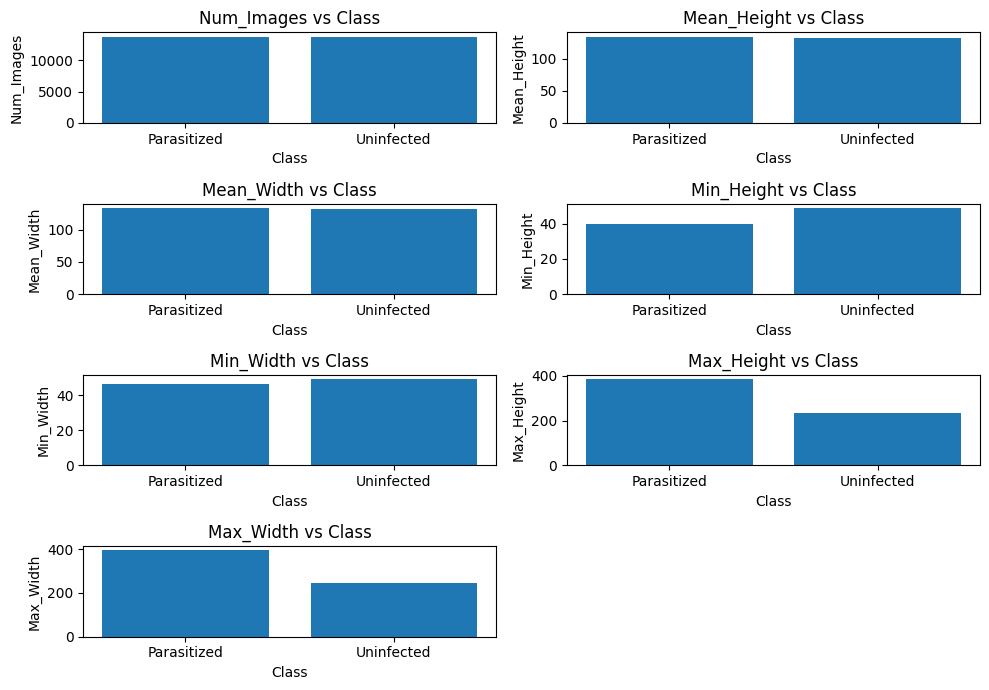

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
data_summary_list = [
    {"index": 0, "Class": "Parasitized", "Num_Images": 13780, "Mean_Height": 134.3868930981929, "Mean_Width": 133.6318310472458, "Min_Height": 40, "Min_Width": 46, "Max_Height": 385, "Max_Width": 394},
    {"index": 1, "Class": "Uninfected", "Num_Images": 13780, "Mean_Height": 131.58001306335728, "Mean_Width": 131.3424776834313, "Min_Height": 49, "Min_Width": 49, "Max_Height": 235, "Max_Width": 247}
]

summary_features = ['Num_Images', 'Mean_Height', 'Mean_Width', 'Min_Height', 'Min_Width', 'Max_Height', 'Max_Width']

# Calculate the number of rows and columns for the grid
num_rows = (len(summary_features) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 7))
axes = axes.flatten()

for i, feature in enumerate(summary_features):
    ax = axes[i]
    ax.bar([entry['Class'] for entry in data_summary_list], [entry[feature] for entry in data_summary_list])
    ax.set_title(f'{feature} vs Class')
    ax.set_xlabel('Class')
    ax.set_ylabel(feature)

# Hide any unused subplots
for j in range(len(summary_features), num_rows * num_cols):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

This code performs shape analysis on images in two classes: "Parasitized" and "Uninfected". Here's a step-by-step explanation:

1. **Importing Libraries**
   - `cv2`: OpenCV library for image processing.
   - `os`: Module for interacting with the operating system.
   - `numpy`: Library for numerical operations in Python.

2. **Setting up Variables**
   - `data_dir`: Path to the directory containing the dataset.
   - `class_labels`: List of class labels ("Parasitized" and "Uninfected").

3. **Creating Dictionaries for Shape Features**
   - `shape_features`: A dictionary to store shape features (area, perimeter, circularity) for each class. It initializes with empty lists for each feature.

4. **Looping Through Classes and Images**
   - It iterates through the class labels ("Parasitized" and "Uninfected").
   - For each class, it creates a path to the class directory.

5. **Processing Each Image in the Class**
   - It iterates through each image file in the class directory.
   - Checks if the file is a PNG image.
   - Reads the image using OpenCV (`cv2.imread`).
   - Converts the image to grayscale.
   - Applies thresholding to create a binary image.

6. **Finding Contours**
   - Finds contours (boundary of objects) in the binary image.

7. **Calculating Shape Features for Each Contour**
   - For each contour, it calculates:
     - `area`: Area of the contour.
     - `perimeter`: Perimeter of the contour.
     - `circularity`: A measure of how close the shape is to a circle.

8. **Storing Shape Features in Dictionary**
   - It appends the calculated shape features to the respective class in `shape_features`.

9. **Calculating Mean Shape Features**
   - For each class, it calculates the mean of the collected shape features.

10. **Printing Mean Shape Features**
    - It prints the mean shape features for each class.

11. **Final Output**
    - Prints "Shape analysis complete."

This code essentially analyzes the shape characteristics of objects in images to extract meaningful features for further analysis or machine learning tasks. It's often used in computer vision applications.

In [ ]:
import cv2
import os
import numpy as np

# Replace with the path to your dataset directory
data_dir = "/content/data/cell_images"
class_labels = ['Parasitized', 'Uninfected']

# Create dictionaries to store shape features for each class
shape_features = {label: {'area': [], 'perimeter': [], 'circularity': []} for label in class_labels}

# Loop through each class
for label in class_labels:
    class_dir = os.path.join(data_dir, label)

    # Loop through each image file in the class directory
    for image_file in os.listdir(class_dir):
        if image_file.endswith(".png"):
            image_path = os.path.join(class_dir, image_file)

            # Read the image
            image = cv2.imread(image_path)

            # Convert the image to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Apply thresholding to create a binary image
            _, thresholded = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

            # Find contours of segmented objects
            contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Calculate shape features for each contour
            for contour in contours:
                area = cv2.contourArea(contour)
                perimeter = cv2.arcLength(contour, True)
                circularity = (4 * np.pi * area) / (perimeter ** 2 + 1e-5)  # Add a small constant

                # Add the shape features to the respective class features
                shape_features[label]['area'].append(area)
                shape_features[label]['perimeter'].append(perimeter)
                shape_features[label]['circularity'].append(circularity)    # circularity: A measure of how close the shape is to a circle.

# Calculate mean shape features for each class
mean_shape_features = {label: {'area': np.mean(features['area']),
                               'perimeter': np.mean(features['perimeter']),
                               'circularity': np.mean(features['circularity'])}
                      for label, features in shape_features.items()}

# Print mean shape features for each class
for label, features in mean_shape_features.items():
    print(f"Mean Shape Features for {label} class:")
    print("Area:", features['area'])
    print("Perimeter:", features['perimeter'])
    print("Circularity:", features['circularity'])
    print()

print("Shape analysis complete.")

Mean Shape Features for Parasitized class:
Area: 12153.694793283477
Perimeter: 525.5241331777099
Circularity: 0.5397935982059696

Mean Shape Features for Uninfected class:
Area: 12053.091184435576
Perimeter: 503.8157575445392
Circularity: 0.5852710699462302

Shape analysis complete.


**LBP** is used for textural classification

LBP works by using a three by three window on an image and extracting an LBP code based on three parameters: central pixel value, radius, and neighboring pixels.

Depending on the result of the computation, if the value is greater than or equal to 0, it is assigned as 1; if it's less than 0, it's assigned as 0.

so we then convert the binary no. we get into decimal


This code performs Local Binary Pattern (LBP) analysis on images in two classes: "Parasitized" and "Uninfected". Here's a step-by-step explanation:

1. **Importing Libraries**
   - `cv2`: OpenCV library for image processing.
   - `os`: Module for interacting with the operating system.
   - `numpy`: Library for numerical operations in Python.
   - `local_binary_pattern` from `skimage.feature`: Function for calculating LBP features.

2. **Setting up Variables**
   - `data_dir`: Path to the directory containing the dataset.
   - `class_labels`: List of class labels ("Parasitized" and "Uninfected").

3. **Creating Dictionaries for LBP Features**
   - `lbp_features`: A dictionary to store LBP histograms for each class. It initializes with empty lists for each class.

4. **Looping Through Classes and Images**
   - It iterates through the class labels ("Parasitized" and "Uninfected").
   - For each class, it creates a path to the class directory.

5. **Processing Each Image in the Class**
   - It iterates through each image file in the class directory.
   - Checks if the file is a PNG image.
   - Reads the image using OpenCV (`cv2.imread`).
   - Converts the image to grayscale.

6. **Calculating LBP Features**
   - It calculates LBP features using the `local_binary_pattern` function.
   - LBP is a texture descriptor that quantifies the local patterns in an image.

7. **Calculating LBP Histogram**
   - It calculates a histogram of the LBP features.

8. **Normalizing the Histogram**
   - It normalizes the histogram to ensure it sums up to 1.

9. **Storing LBP Histogram in Dictionary**
   - It appends the calculated LBP histogram to the respective class in `lbp_features`.

10. **Calculating Mean LBP Histograms**
    - For each class, it calculates the mean of the collected LBP histograms.

11. **Printing Mean LBP Histograms**
    - It prints the mean LBP histograms for each class.

12. **Final Output**
    - Prints "Local Binary Pattern (LBP) analysis complete."

This code is used to extract texture features from images, which can be valuable for tasks like texture classification or object recognition. LBP is a popular texture descriptor in computer vision.

In [ ]:
import cv2
import os
import numpy as np
from skimage.feature import local_binary_pattern

# Replace with the path to your dataset directory
data_dir = "/content/data/cell_images"
class_labels = ['Parasitized', 'Uninfected']

# Create dictionaries to store LBP features for each class
lbp_features = {label: [] for label in class_labels}

# Loop through each class
for label in class_labels:
    class_dir = os.path.join(data_dir, label)

    # Loop through each image file in the class directory
    for image_file in os.listdir(class_dir):
        if image_file.endswith(".png"):
            image_path = os.path.join(class_dir, image_file)

            # Read the image
            image = cv2.imread(image_path)

            # Convert the image to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Calculate LBP features
            radius = 1
            n_points = 8 * radius
            lbp_image = local_binary_pattern(gray, n_points, radius, method='uniform')

            # Once we've calculated these binary codes for all pixels, we end up with a set of codes (for example, 00011010, 11001001, etc.). These codes by themselves don't tell us much.
            # Histogram Quantifies Patterns:
            # The histogram takes all these codes and tells us how frequently each code occurs in the image. In other words, it counts how many times each texture pattern appears


            # Calculate the histogram of LBP features
            hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
            hist = hist.astype("float")
            hist /= (hist.sum() + 1e-7)



            # Add the LBP histogram to the respective class features
            lbp_features[label].append(hist)

# Calculate mean LBP histograms for each class
mean_lbp_features = {label: np.mean(features, axis=0) for label, features in lbp_features.items()}

# Print mean LBP histograms for each class
for label, features in mean_lbp_features.items():
    print(f"Mean LBP Features for {label} class:")
    print(features)
    print()

print("Local Binary Pattern (LBP) analysis complete.")

Mean LBP Features for Parasitized class:
[0.02598063 0.05229324 0.02719223 0.0735123  0.09944709 0.11337352
 0.06843618 0.06133902 0.3832053  0.0952205 ]

Mean LBP Features for Uninfected class:
[0.02723606 0.05590102 0.02620734 0.07100449 0.08477802 0.10998809
 0.07035574 0.06712801 0.38421621 0.10318503]

Local Binary Pattern (LBP) analysis complete.


### Approach 1

In [ ]:
# file operations
import os
# to list files
import glob

# for numerical analysis
import numpy as np
# to store and process in a dataframe
import pandas as pd

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical, plot_model
# process image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# callback functions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [ ]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels
TARGET_SIZE = 64
EPOCHS = 10

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

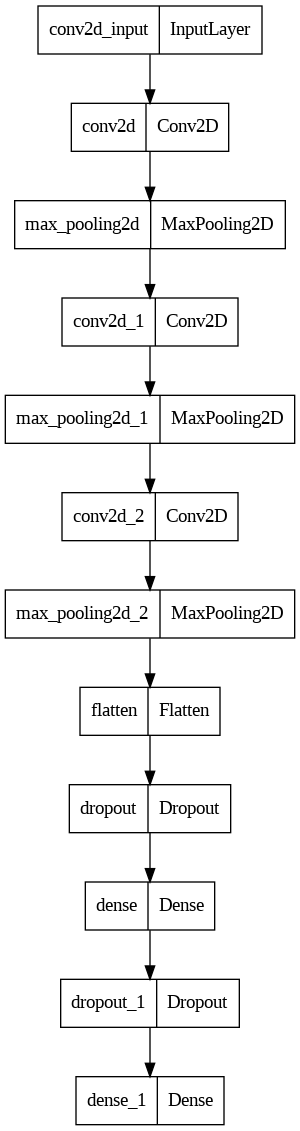

<Figure size 500x1000 with 0 Axes>

In [ ]:
plt.figure(figsize=(5, 10))
plot_model(model, to_file="model.png")

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.3)

train_data = datagen.flow_from_directory('/content/data/cell_images/cell_images',
                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         class_mode='binary',
                                         subset='training')

validation_data = datagen.flow_from_directory('/content/data/cell_images/cell_images',
                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                              batch_size=BATCH_SIZE,
                                              shuffle=True,
                                              class_mode='binary',
                                              subset='validation')

Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


In [ ]:
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta = 0.01,
                               patience=5)

# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.hdf5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)

In [ ]:
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=EPOCHS,
                    verbose=1,
                    callbacks=[early_stopping, model_save])

Epoch 1/10
193/193 [==============================] - 191s 926ms/step - loss: 0.6494 - accuracy: 0.6082 - val_loss: 0.4655 - val_accuracy: 0.8592
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


193/193 [==============================] - 178s 926ms/step - loss: 0.3476 - accuracy: 0.8834 - val_loss: 0.2564 - val_accuracy: 0.9010
Epoch 3/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


193/193 [==============================] - 176s 912ms/step - loss: 0.2582 - accuracy: 0.9080 - val_loss: 0.2467 - val_accuracy: 0.9000
Epoch 4/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


193/193 [==============================] - 176s 913ms/step - loss: 0.2397 - accuracy: 0.9159 - val_loss: 0.2362 - val_accuracy: 0.9029
Epoch 5/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


193/193 [==============================] - 175s 907ms/step - loss: 0.2216 - accuracy: 0.9255 - val_loss: 0.2111 - val_accuracy: 0.9139
Epoch 6/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


193/193 [==============================] - 176s 913ms/step - loss: 0.2139 - accuracy: 0.9285 - val_loss: 0.2062 - val_accuracy: 0.9296
Epoch 7/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


193/193 [==============================] - 176s 912ms/step - loss: 0.2037 - accuracy: 0.9318 - val_loss: 0.1943 - val_accuracy: 0.9255
Epoch 8/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


193/193 [==============================] - 176s 911ms/step - loss: 0.2006 - accuracy: 0.9334 - val_loss: 0.2013 - val_accuracy: 0.9250
Epoch 9/10
193/193 [==============================] - 175s 909ms/step - loss: 0.1988 - accuracy: 0.9318 - val_loss: 0.2047 - val_accuracy: 0.9240
Epoch 10/10
193/193 [==============================] - 176s 914ms/step - loss: 0.1972 - accuracy: 0.9331 - val_loss: 0.2028 - val_accuracy: 0.9204


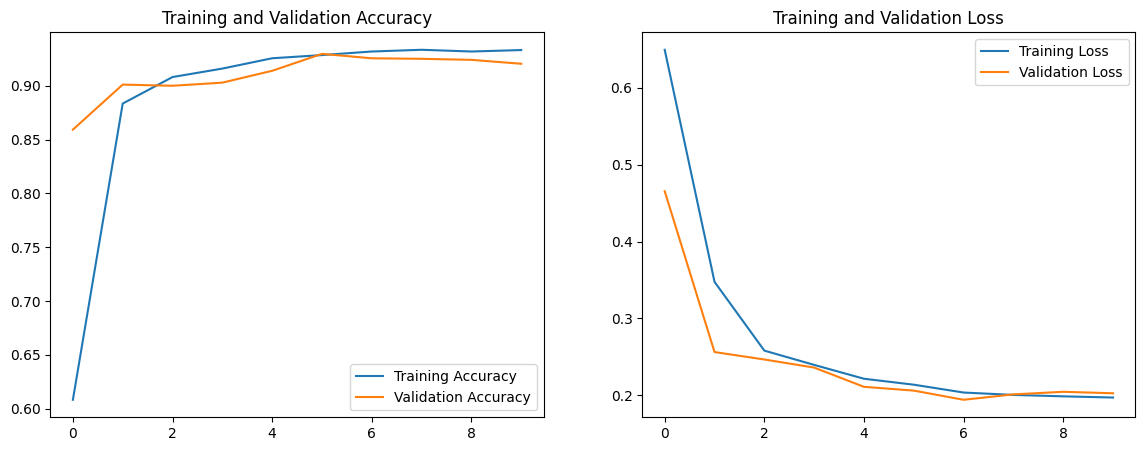

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

### Approach 2

In [ ]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 100.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 58.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: te

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Generate data paths with labels
data_dir = '/content/data/cell_images'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.6, shuffle= True, random_state= 123)

In [ ]:
# crobed image size
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar)
ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)

Found 22045 validated image filenames belonging to 2 classes.
Found 3307 validated image filenames belonging to 2 classes.
Found 2206 validated image filenames belonging to 2 classes.


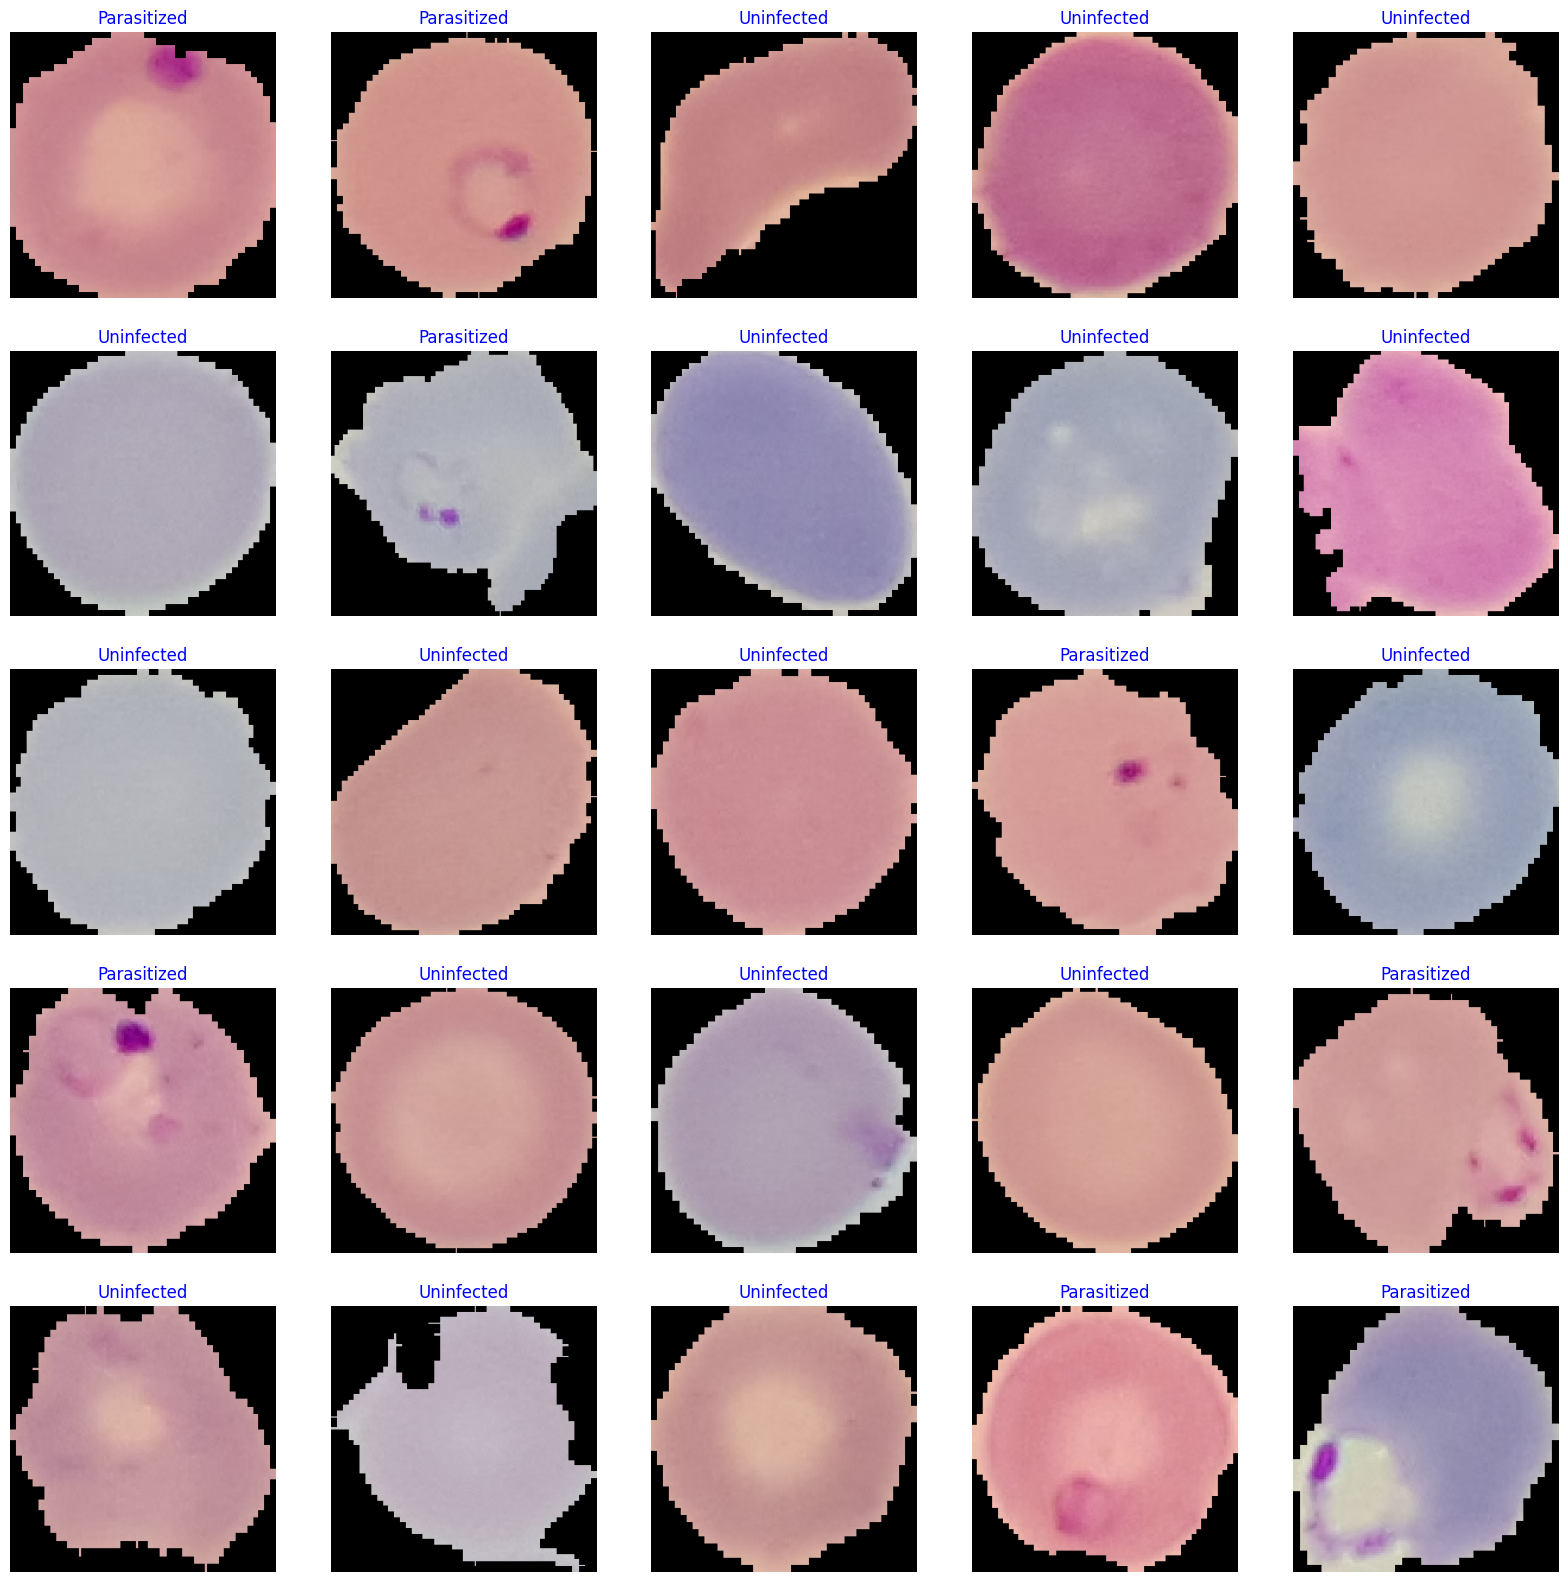

In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

# calculate number of displayed samples
length = len(labels)        # length of batch size
sample = min(length, 25)    # check if sample less than 25 images

plt.figure(figsize= (20, 20))

for i in range(sample):
    plt.subplot(5, 5, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [ ]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor # factor by which to reduce the learning rate
        self.batches = batches # number of training batch to run per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initial learning rate and save it
        self.highest_tracc = 0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss = np.inf # set lowest validation loss to infinity initially
        self.best_weights = self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights = self.model.get_weights()   # save initial weights if they have to get restored

    # Define a function that will run when train begins
    def on_train_begin(self, logs= None):
        msg = 'Do you want model asks you to halt the training [y/n] ?'
        print(msg)
        ans = input('')
        if ans in ['Y', 'y']:
            self.ask_permission = 1
        elif ans in ['N', 'n']:
            self.ask_permission = 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()


    def on_train_end(self, logs= None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print(msg)

        # set the weights of the model to the best weights
        self.model.set_weights(self.best_weights)


    def on_train_batch_end(self, batch, logs= None):
        # get batch accuracy and loss
        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # prints over on the same line to show running batch count
        msg = '{0:20s}processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')


    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()


    # Define method runs on the end of each epoch
    def on_epoch_end(self, epoch, logs= None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr = lr
        acc = logs.get('accuracy')  # get training accuracy
        v_acc = logs.get('val_accuracy')  # get validation accuracy
        loss = logs.get('loss')  # get training loss for this epoch
        v_loss = logs.get('val_loss')  # get the validation loss for this epoch

        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc ) * 100 / self.highest_tracc # define improvement of model progres

            if acc > self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc = acc # set new highest training accuracy
                self.best_weights = self.model.get_weights() # training accuracy improved so save the weights
                self.count = 0 # set count to 0 since training accuracy improved
                self.stop_count = 0 # set stop counter to 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1  # set the value of best epoch for this epoch

            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count >= self.patience - 1: # lr should be adjusted
                    lr = lr * self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count = 0 # reset the count to 0
                    self.stop_count = self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count = 0 # reset counter
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1 # increment patience counter

        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0

            else:
                pimprov = (self.lowest_vloss - v_loss ) * 100 / self.lowest_vloss

            if v_loss < self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss = v_loss # replace lowest validation loss with new validation loss
                self.best_weights = self.model.get_weights() # validation loss improved so save the weights
                self.count = 0 # reset count since validation loss improved
                self.stop_count = 0
                self.best_epoch = epoch + 1 # set the value of the best epoch to this epoch

            else: # validation loss did not improve
                if self.count >= self.patience - 1: # need to adjust lr
                    lr = lr * self.factor # adjust the learning rate
                    self.stop_count = self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count = 0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer

                else:
                    self.count = self.count + 1 # increment the patience counter

                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count > self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg = f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True # stop training

        else:
            if self.ask_epoch != None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'enter H to halt training or an integer for number of epochs to run then ask again'
                    print(msg)

                    ans = input('')
                    if ans == 'H' or ans == 'h':
                        msg = f'training has been halted at epoch {epoch + 1} due to user input'
                        print(msg)
                        self.model.stop_training = True # stop training

                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f' training will continue until epoch {str(self.ask_epoch)}'
                            print(msg)
                            msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(msg)

                        except Exception:
                            print('Invalid')

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    # Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
    #             bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2)                 3074      
                                                                 
Total params: 10,792,753
Trainable params: 10,702,378
Non-trainable params: 90,375
_________________________________________________________________


In [ ]:
batch_size = 64   # set batch size for training
epochs = 40   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

callbacks = [MyCallback(model= model, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

In [ ]:
history = model.fit(x= train_gen, epochs= epochs, verbose= 0, callbacks= callbacks,
                    validation_data= valid_gen, validation_steps= None, shuffle= False)

Do you want model asks you to halt the training [y/n] ?
n
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration


ResourceExhaustedError: ignored

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()


In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [ ]:
model_name = model.input_names[0][:-6]
subject = 'Malaria Detection'
acc = test_score[1] * 100
save_path = ''

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model.save_weights(weights_save_loc)
print(f'weights were saved as {weights_save_loc}')

In [ ]:
class_dict = train_gen.class_indices
img_size = train_gen.image_shape
height = []
width = []
for _ in range(len(class_dict)):
    height.append(img_size[0])
    width.append(img_size[1])

Index_series = pd.Series(list(class_dict.values()), name= 'class_index')
Class_series = pd.Series(list(class_dict.keys()), name= 'class')
Height_series = pd.Series(height, name= 'height')
Width_series = pd.Series(width, name= 'width')
class_df = pd.concat([Index_series, Class_series, Height_series, Width_series], axis= 1)
csv_name = f'{subject}-class_dict.csv'
csv_save_loc = os.path.join(save_path, csv_name)
class_df.to_csv(csv_save_loc, index= False)
print(f'class csv file was saved as {csv_save_loc}')